In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df= pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df=df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Class          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df['Class'].value_counts()

Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [12]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Class            0
dtype: int64

<Axes: >

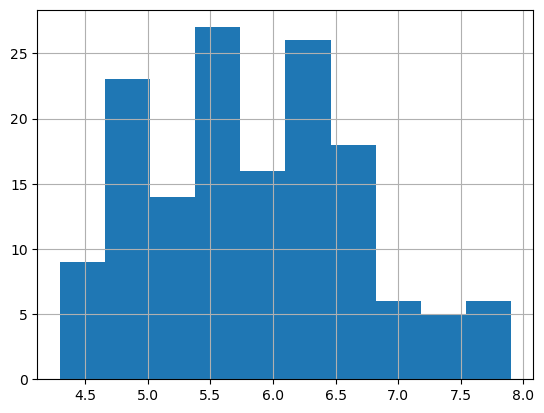

In [13]:
df['SepalLengthCm'].hist()

<Axes: >

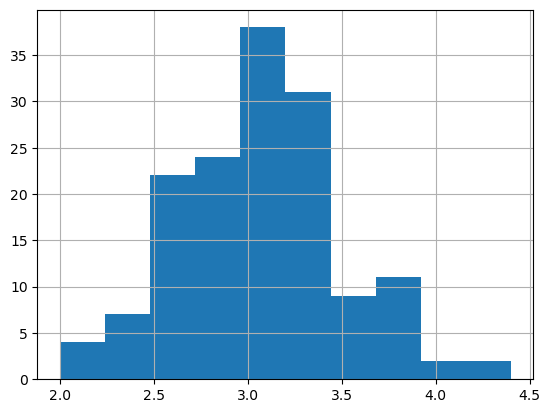

In [14]:
df['SepalWidthCm'].hist()

<Axes: >

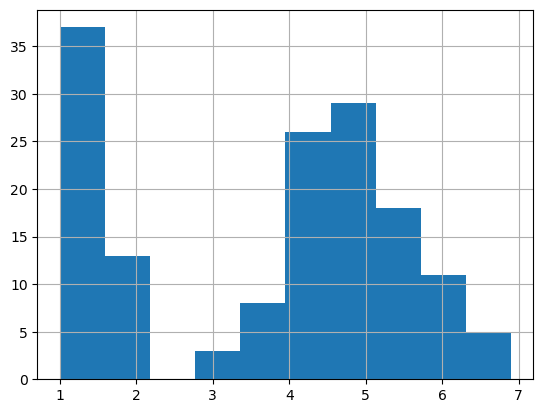

In [15]:
df['PetalLengthCm'].hist()

<Axes: >

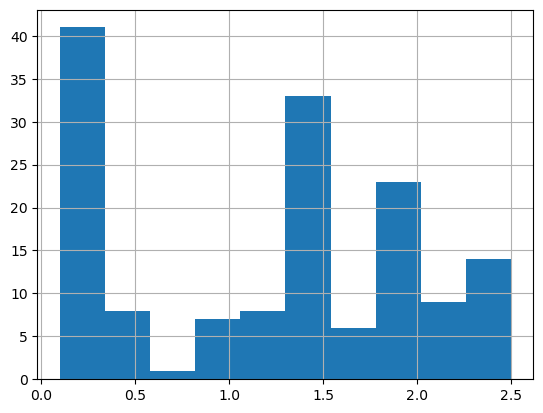

In [16]:
df['PetalWidthCm'].hist()

In [17]:
#scatterplot

colors=['red' , 'orange' , 'blue']
Class =['Iris-setosa' , 'Iris-versicolor'  , 'Iris-virginica']


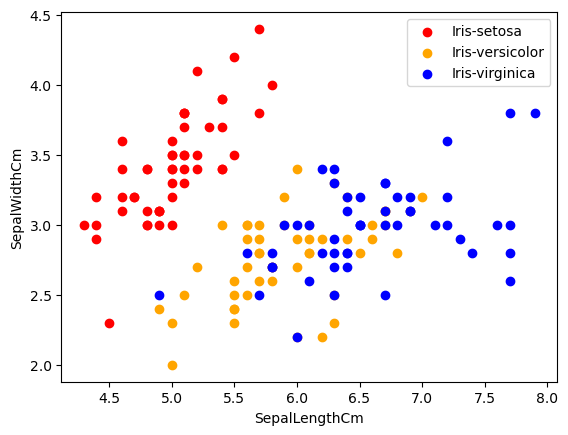

In [18]:
for i in range(3):
    x = df[df['Class'] == Class[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label = Class[i])
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
plt.legend()

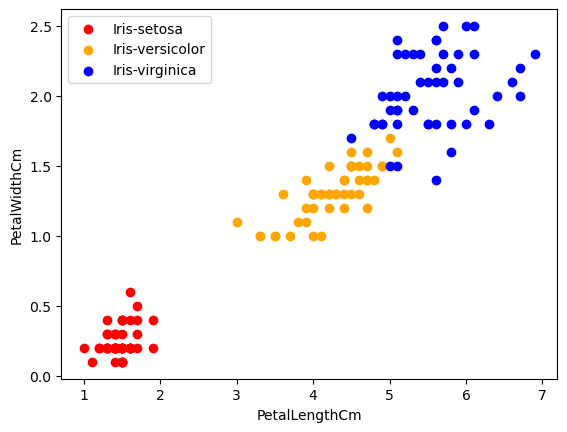

In [19]:
for i in range(3):
    x = df[df['Class'] == Class[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label = Class[i])
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.legend()

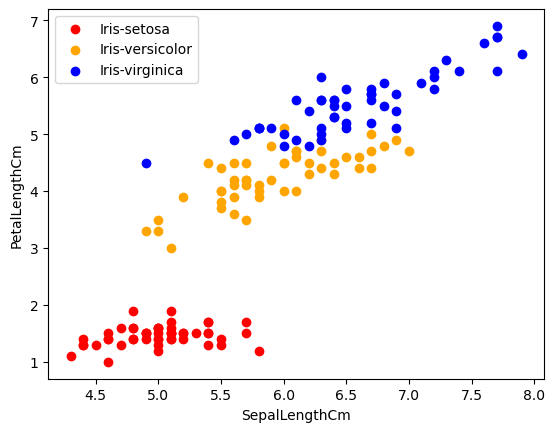

In [20]:
for i in range(3):
    x = df[df['Class'] == Class[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label = Class[i])
plt.xlabel("SepalLengthCm")
plt.ylabel("PetalLengthCm")
plt.legend()

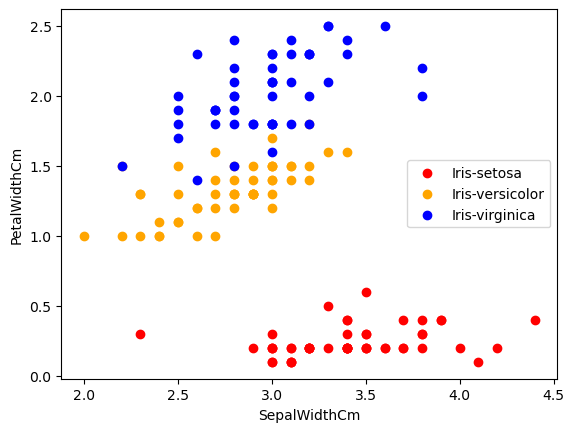

In [21]:
for i in range(3):
    x = df[df['Class'] == Class[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label = Class[i])
plt.xlabel("SepalWidthCm")
plt.ylabel("PetalWidthCm")
plt.legend()

In [22]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()

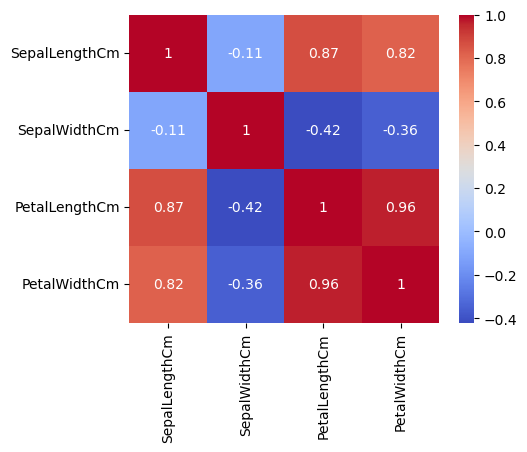

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')
plt.show()

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
df['Class'] =le.fit_transform(df['Class'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [50]:
from sklearn.model_selection import train_test_split

#train - 70
#test - 30

X = df.drop(columns=['Class'])
Y = df['Class']
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.30)

In [51]:
#logisticregression 

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [52]:
#model trainee
model.fit(x_train, y_train)

C:\Users\anant\Downloads\python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
#print metric to get performance 

print("Accuracy:",model.score(x_test,y_test) * 100)

Accuracy: 100.0


In [54]:
#knn - k - nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [55]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [56]:
print("Accuracy:",model.score(x_test,y_test) * 100)

Accuracy: 100.0


In [57]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [58]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [61]:
#print metric to get performance 

print("Accuracy:",model.score(x_test,y_test) * 100)

Accuracy: 100.0
